In [2]:
# importing all neccessary libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Read the csv file
df=pd.read_csv(r"C:\Users\DELL\Downloads\Student_Performance.csv")

In [4]:
# View the Csv File
df.head()

Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0

In [5]:
df.shape

(10000, 6)

In [6]:
#Information about dataset file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
#Check the null values
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [8]:
# Drop the duplicates 
df.drop_duplicates(inplace=True)

In [9]:
df['Extracurricular Activities'].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
# cleaning the dataset
from sklearn.preprocessing import LabelEncoder, StandardScaler
le=LabelEncoder()
df['Extracurricular Activities']=le.fit_transform(df['Extracurricular Activities'])

In [11]:
if 'Extracurricular Activities' in df.columns:
    df['Extracurricular Activities'] = df['Extracurricular Activities'].fillna('No')


In [12]:
# Finding the missing value
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

In [13]:
#create the new column
df['Study Efficiency']=df['Hours Studied']/ df['Sleep Hours']

In [14]:
df["Practice Intensity"]=df["Sample Question Papers Practiced"]/ (df["Hours Studied"]+ 1e-5)

In [15]:
df

Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0                 7               99                           1            9   
1                 4               82                           0            4   
2                 8               51                           1            7   
3                 5               52                           1            5   
4                 7               75                           0            8   
...             ...              ...                         ...          ...   
9995              1               49                           1            4   
9996              7               64                           1            8   
9997              6               83                           1            8   
9998              9               97                           1            7   
9999              7               74                           0            8   

      Sample Question Papers Practiced  Performance Index  Study Efficiency  \
0                                    1               91.0          0.777778   
1                                    2               65.0          1.000000   
2                                    2               45.0          1.142857   
3                                    2               36.0          1.000000   
4                                    5               66.0          0.875000   
...                                ...                ...               ...   
9995                                 2               23.0          0.250000   
9996                                 5               58.0          0.875000   
9997                                 5               74.0          0.750000   
9998                                 0               95.0          1.285714   
9999                                 1               64.0          0.875000   

      Practice Intensity  
0               0.142857  
1               0.499999  
2               0.250000  
3               0.399999  
4               0.714285  
...                  ...  
9995            1.999980  
9996            0.714285  
9997            0.833332  
9998            0.000000  
9999            0.142857  

[9873 rows x 8 columns]

In [16]:
df['Previous Scores'].unique()

array([99, 82, 51, 52, 75, 78, 73, 45, 77, 89, 91, 79, 47, 72, 83, 54, 96,
       74, 85, 61, 62, 84, 94, 90, 44, 70, 67, 97, 59, 55, 68, 63, 46, 76,
       43, 81, 93, 98, 48, 92, 64, 88, 60, 87, 40, 69, 80, 95, 49, 50, 53,
       71, 56, 58, 66, 65, 57, 41, 42, 86], dtype=int64)

In [17]:
df['Sleep Hours'].unique()

array([9, 4, 7, 5, 8, 6], dtype=int64)

In [18]:
# Bins the given column into 3 tiers
df['Previous Score Tier']=pd.cut(df['Previous Scores'],bins=[0,50,75,100],labels=['Low','Medium','High'])

In [19]:
df['Sleep Category']=pd.cut(df['Sleep Hours'], bins=[0,5,7,9],labels=['Low','Moderate','Optimal'])

In [20]:
# Convert column datatype into string
df['Sleep Category']=df['Sleep Category'].astype(str)

In [21]:
df['Previous Score Tier']=df['Previous Score Tier'].astype(str)

In [22]:
# performs  encoding on the categorical columns
df = pd.get_dummies(df, columns=["Previous Score Tier", "Sleep Category"], drop_first=True)

In [23]:
x=df.drop('Performance Index', axis=1)
y=df['Performance Index']
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)
x_scaled=pd.DataFrame(x_scaler, columns=x.columns)
scaled=x_scaled.copy()
scaled['Performance Index']=y
scaled.head()

Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0       0.775566         1.706168                    1.010078     1.454025   
1      -0.383205         0.724912                   -0.990022    -1.491315   
2       1.161822        -1.064438                    1.010078     0.275889   
3       0.003052        -1.006717                    1.010078    -0.902247   
4       0.775566         0.320865                   -0.990022     0.864957   

   Sample Question Papers Practiced  Study Efficiency  Practice Intensity  \
0                         -1.249715         -0.091015           -0.755696   
1                         -0.900925          0.353423           -0.548329   
2                         -0.900925          0.639132           -0.693485   
3                         -0.900925          0.353423           -0.606391   
4                          0.145444          0.103427           -0.423908   

   Previous Score Tier_Low  Previous Score Tier_Medium  \
0                -0.468981                   -0.850492   
1                -0.468981                   -0.850492   
2                -0.468981                    1.175789   
3                -0.468981                    1.175789   
4                -0.468981                    1.175789   

   Sleep Category_Moderate  Sleep Category_Optimal  Performance Index  
0                -0.708235                1.382892               91.0  
1                -0.708235               -0.723122               65.0  
2                 1.411961               -0.723122               45.0  
3                -0.708235               -0.723122               36.0  
4                -0.708235                1.382892               66.0

In [24]:
df

Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0                 7               99                           1            9   
1                 4               82                           0            4   
2                 8               51                           1            7   
3                 5               52                           1            5   
4                 7               75                           0            8   
...             ...              ...                         ...          ...   
9995              1               49                           1            4   
9996              7               64                           1            8   
9997              6               83                           1            8   
9998              9               97                           1            7   
9999              7               74                           0            8   

      Sample Question Papers Practiced  Performance Index  Study Efficiency  \
0                                    1               91.0          0.777778   
1                                    2               65.0          1.000000   
2                                    2               45.0          1.142857   
3                                    2               36.0          1.000000   
4                                    5               66.0          0.875000   
...                                ...                ...               ...   
9995                                 2               23.0          0.250000   
9996                                 5               58.0          0.875000   
9997                                 5               74.0          0.750000   
9998                                 0               95.0          1.285714   
9999                                 1               64.0          0.875000   

      Practice Intensity  Previous Score Tier_Low  Previous Score Tier_Medium  \
0               0.142857                    False                       False   
1               0.499999                    False                       False   
2               0.250000                    False                        True   
3               0.399999                    False                        True   
4               0.714285                    False                        True   
...                  ...                      ...                         ...   
9995            1.999980                     True                       False   
9996            0.714285                    False                        True   
9997            0.833332                    False                       False   
9998            0.000000                    False                       False   
9999            0.142857                    False                        True   

      Sleep Category_Moderate  Sleep Category_Optimal  
0                       False                    True  
1                       False                   False  
2                        True                   False  
3                       False                   False  
4                       False                    True  
...                       ...                     ...  
9995                    False                   False  
9996                    False                    True  
9997                    False                    True  
9998                     True                   False  
9999                    False                    True  

[9873 rows x 12 columns]

In [25]:
x=df.iloc[:,1:]
x

Previous Scores  Extracurricular Activities  Sleep Hours  \
0                  99                           1            9   
1                  82                           0            4   
2                  51                           1            7   
3                  52                           1            5   
4                  75                           0            8   
...               ...                         ...          ...   
9995               49                           1            4   
9996               64                           1            8   
9997               83                           1            8   
9998               97                           1            7   
9999               74                           0            8   

      Sample Question Papers Practiced  Performance Index  Study Efficiency  \
0                                    1               91.0          0.777778   
1                                    2               65.0          1.000000   
2                                    2               45.0          1.142857   
3                                    2               36.0          1.000000   
4                                    5               66.0          0.875000   
...                                ...                ...               ...   
9995                                 2               23.0          0.250000   
9996                                 5               58.0          0.875000   
9997                                 5               74.0          0.750000   
9998                                 0               95.0          1.285714   
9999                                 1               64.0          0.875000   

      Practice Intensity  Previous Score Tier_Low  Previous Score Tier_Medium  \
0               0.142857                    False                       False   
1               0.499999                    False                       False   
2               0.250000                    False                        True   
3               0.399999                    False                        True   
4               0.714285                    False                        True   
...                  ...                      ...                         ...   
9995            1.999980                     True                       False   
9996            0.714285                    False                        True   
9997            0.833332                    False                       False   
9998            0.000000                    False                       False   
9999            0.142857                    False                        True   

      Sleep Category_Moderate  Sleep Category_Optimal  
0                       False                    True  
1                       False                   False  
2                        True                   False  
3                       False                   False  
4                       False                    True  
...                       ...                     ...  
9995                    False                   False  
9996                    False                    True  
9997                    False                    True  
9998                     True                   False  
9999                    False                    True  

[9873 rows x 11 columns]

In [26]:
Y=df['Sleep Category_Optimal']
Y

0        True
1       False
2       False
3       False
4        True
        ...  
9995    False
9996     True
9997     True
9998    False
9999     True
Name: Sleep Category_Optimal, Length: 9873, dtype: bool

In [27]:
# Training and Testing the data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.30,random_state=1)

In [28]:
#Random Sampling
np.random.seed(42)
df['Gender'] = np.random.choice(['Male', 'Female'], size=len(df))
df['Parental Education'] = np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], size=len(df))

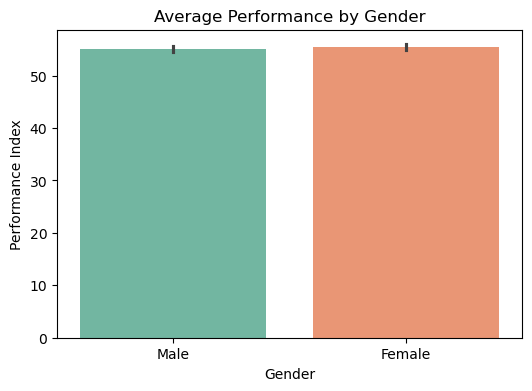

In [29]:
# Bar Plot of male and female students
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Gender', y='Performance Index', palette='Set2')
plt.title("Average Performance by Gender")
plt.ylabel("Performance Index")
plt.show()

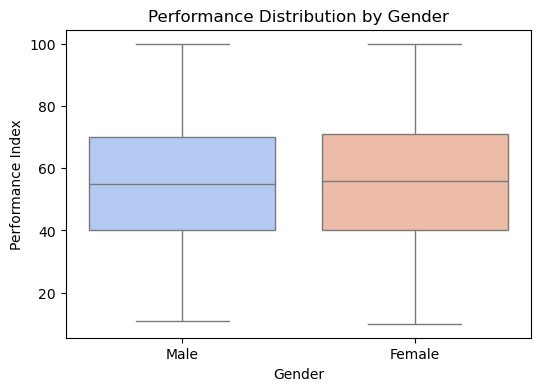

In [30]:
# Boxplot to visulize the distribution of students
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Gender', y='Performance Index', palette='coolwarm')
plt.title("Performance Distribution by Gender")
plt.show()

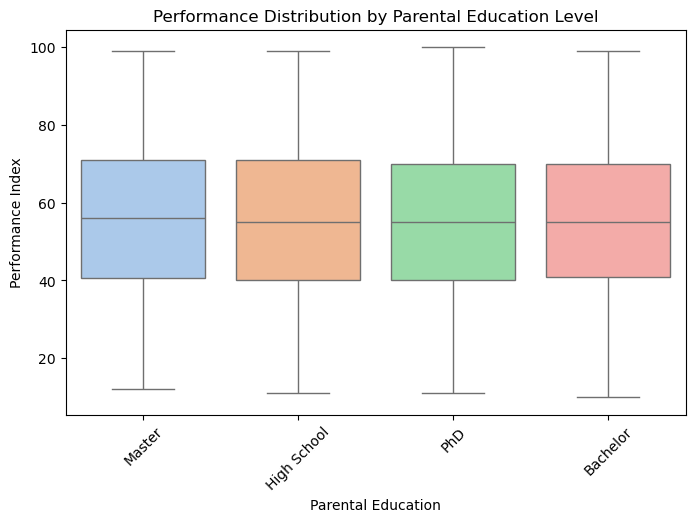

In [31]:
#Box plot of performance distribution by parental education level
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Parental Education', y='Performance Index', palette='pastel')
plt.xticks(rotation=45)
plt.title("Performance Distribution by Parental Education Level")
plt.show()

In [32]:
# extract the names of all numeric columns
num_cols=df.select_dtypes(include=['int64','float64']).columns

In [33]:
# To layout multiple plots in a grid format
import math
num_plots = len(num_cols)
cols = 2
rows = math.ceil(num_plots / cols)

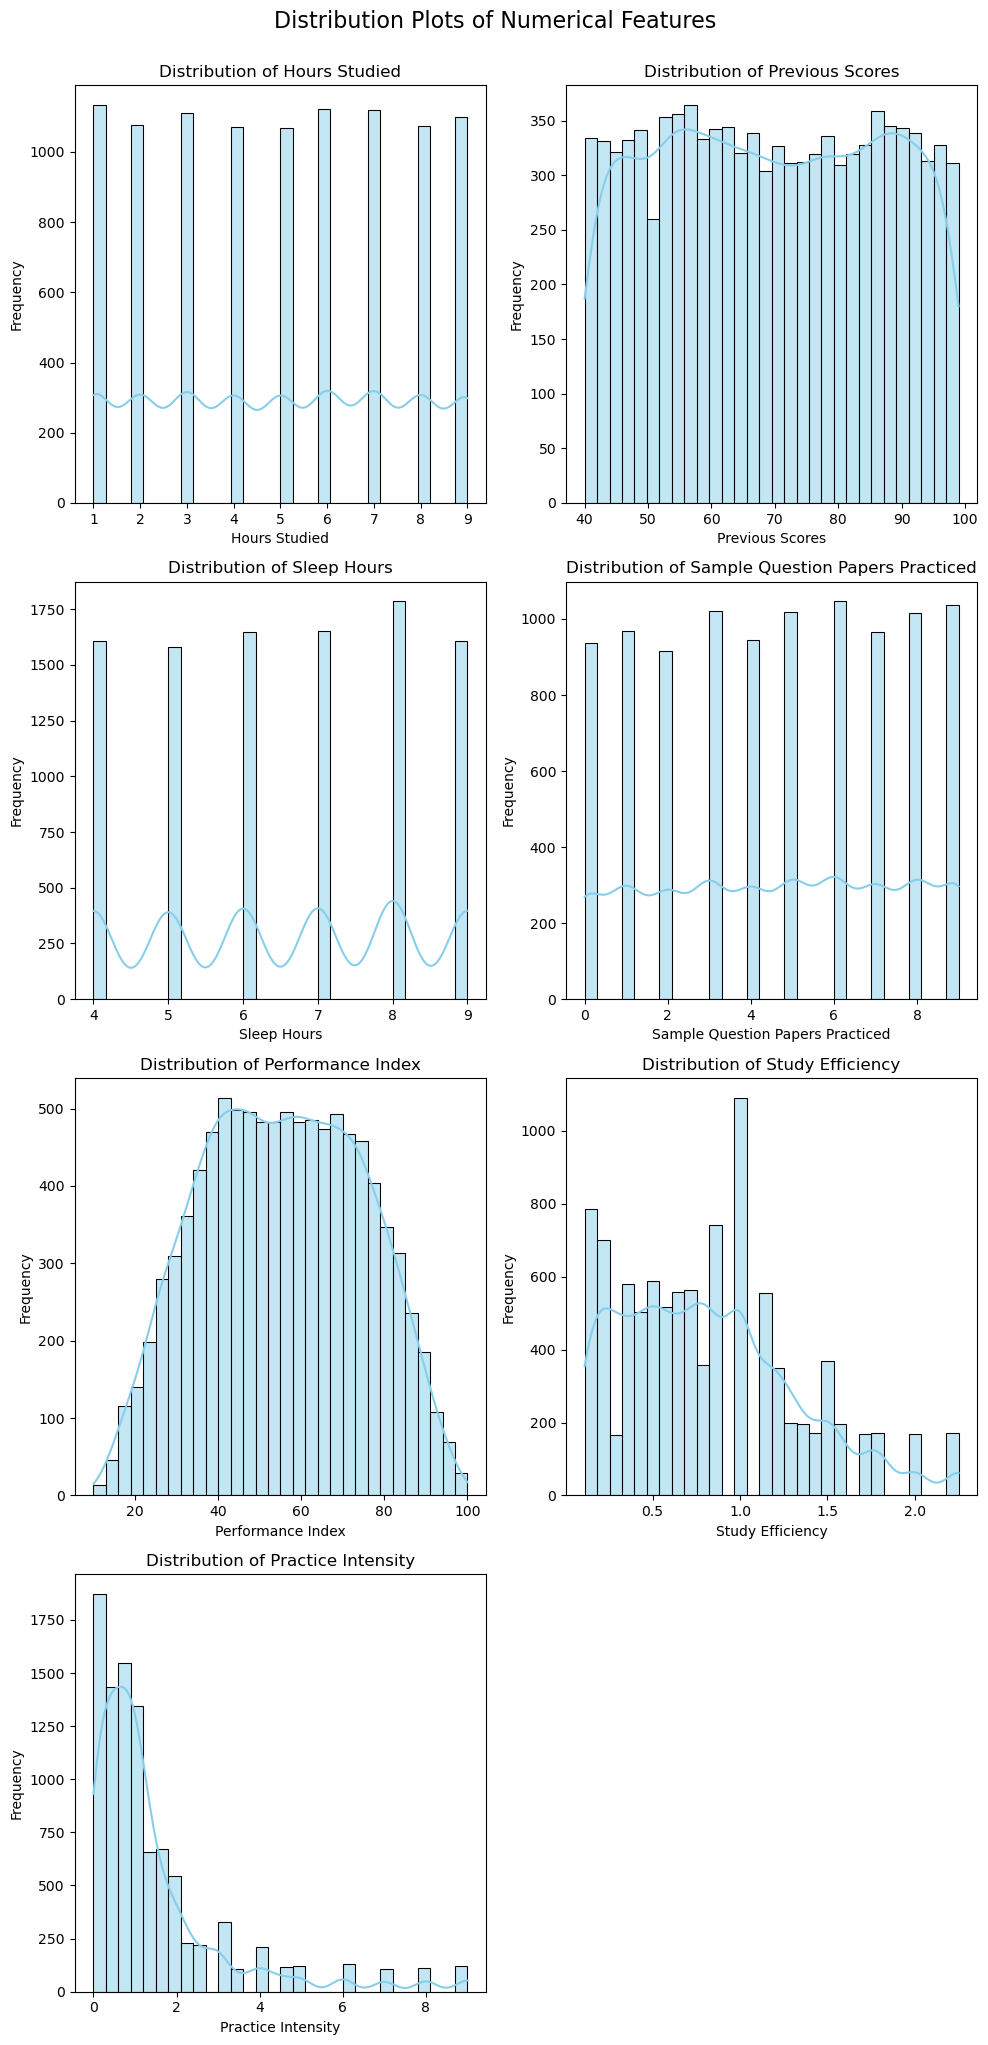

In [34]:
# generates histograms of all numerical columns
plt.figure(figsize=(10, 5 * rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.suptitle("Distribution Plots of Numerical Features", fontsize=16, y=1.02)
plt.show()

In [35]:
#correlation matrix of numeric columns only 
corr_matrix=df.corr(numeric_only=True)

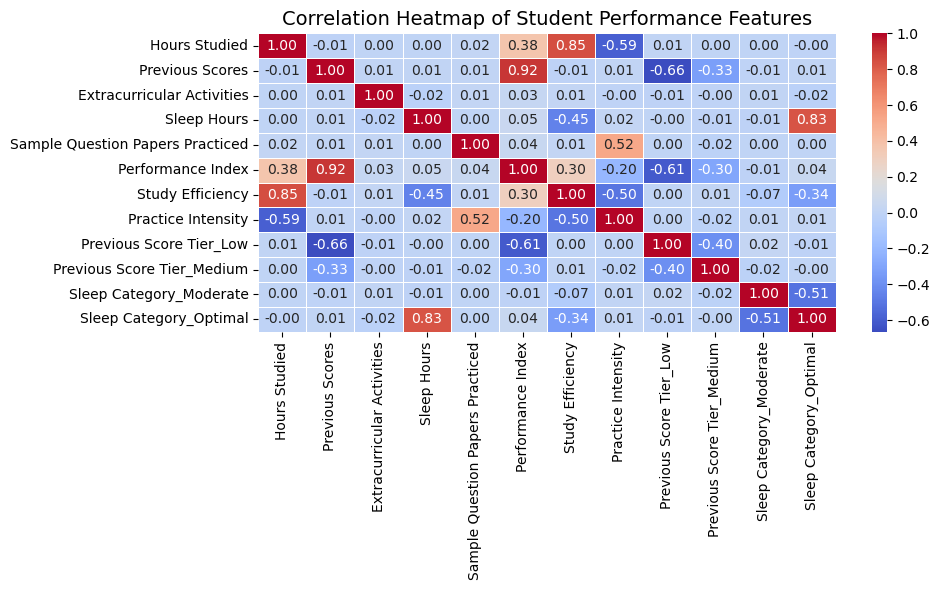

In [36]:
# Heatmap of student performance features
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm',linewidths=0.5,fmt='.2f')
plt.title('Correlation Heatmap of Student Performance Features',fontsize=14)
plt.tight_layout()
plt.show()

# Logistic Regression

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.linear_model import LogisticRegression

In [38]:
# create a classification target from performance
def categorize_performance(score):
    if score>=80:
        return "High"
    elif score>=50:
        return 'Medium'
    else:
        return 'Low'

In [39]:
df['Performance Category']=df['Performance Index'].apply(categorize_performance)

In [40]:
np.random.seed(42)
df['Gender'] = np.random.choice(['Male', 'Female'], size=len(df))
df['Parental Education'] = np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], size=len(df))

In [41]:
# performs  encoding on the categorical columns
df_encoded = pd.get_dummies(df, columns=['Extracurricular Activities', 'Gender', 'Parental Education'], drop_first=True)

In [42]:
# prepare features and target
X=df_encoded.drop(columns=['Performance Index','Performance Category'])
y=df['Performance Category']

In [43]:
#training the model
le=LabelEncoder()
y_encoded=le.fit_transform(y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)
log_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9544303797468354

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       245
           1       0.96      0.97      0.97       771
           2       0.96      0.95      0.95       959

    accuracy                           0.95      1975
   macro avg       0.95      0.95      0.95      1975
weighted avg       0.95      0.95      0.95      1975



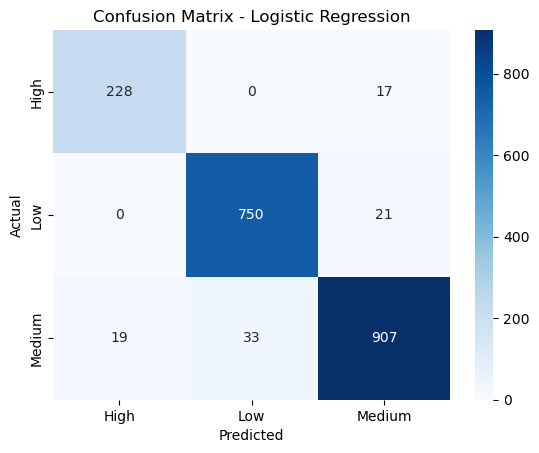

In [46]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


# Support Vector Machine (SVM)

In [47]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
ypred=svm.predict(X_test)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       245
           1       0.96      0.97      0.97       771
           2       0.96      0.95      0.95       959

    accuracy                           0.95      1975
   macro avg       0.95      0.95      0.95      1975
weighted avg       0.95      0.95      0.95      1975



In [49]:
# Trains SVM  using linear kernel
svm=SVC(kernel='linear')
svm.fit(X_train,y_train)
ypred=svm.predict(X_test)

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       245
           1       0.96      0.97      0.97       771
           2       0.96      0.95      0.95       959

    accuracy                           0.95      1975
   macro avg       0.95      0.95      0.95      1975
weighted avg       0.95      0.95      0.95      1975



In [51]:
# check the different values to train the model
svm1 = SVC (C=1,gamma=1)
svm2 = SVC (C=1,gamma=10)
svm3 = SVC (C=10,gamma=1)
svm4 = SVC (C=10,gamma=10)

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
param_grid={"C":[1,10],"gamma":[1,10]}
param_grid

{'C': [1, 10], 'gamma': [1, 10]}

In [54]:
gs=GridSearchCV(svm,param_grid,verbose=2)

In [55]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .......................................C=1, gamma=1; total time=   0.4s
[CV] END .......................................C=1, gamma=1; total time=   0.4s
[CV] END .......................................C=1, gamma=1; total time=   0.5s
[CV] END .......................................C=1, gamma=1; total time=   0.4s
[CV] END .......................................C=1, gamma=1; total time=   0.2s
[CV] END ......................................C=1, gamma=10; total time=   0.2s
[CV] END ......................................C=1, gamma=10; total time=   0.1s
[CV] END ......................................C=1, gamma=10; total time=   0.2s
[CV] END ......................................C=1, gamma=10; total time=   0.2s
[CV] END ......................................C=1, gamma=10; total time=   0.2s
[CV] END ......................................C=10, gamma=1; total time=   0.4s
[CV] END ......................................C=

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 10], 'gamma': [1, 10]}, verbose=2)

In [56]:
gs.best_params_

{'C': 10, 'gamma': 1}

In [57]:
svm=SVC(kernel='poly',C=1,gamma=1)
svm.fit(X_train,y_train)
ypred=svm.predict(X_test)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       245
           1       0.96      0.97      0.97       771
           2       0.96      0.95      0.95       959

    accuracy                           0.95      1975
   macro avg       0.95      0.95      0.95      1975
weighted avg       0.95      0.95      0.95      1975



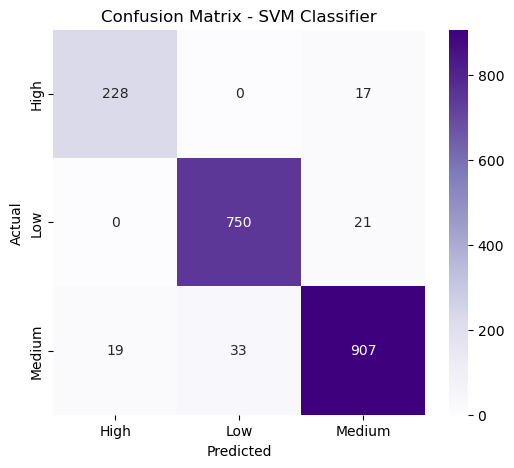

In [59]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM Classifier")
plt.show()

# Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [61]:
df

Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0                 7               99                           1            9   
1                 4               82                           0            4   
2                 8               51                           1            7   
3                 5               52                           1            5   
4                 7               75                           0            8   
...             ...              ...                         ...          ...   
9995              1               49                           1            4   
9996              7               64                           1            8   
9997              6               83                           1            8   
9998              9               97                           1            7   
9999              7               74                           0            8   

      Sample Question Papers Practiced  Performance Index  Study Efficiency  \
0                                    1               91.0          0.777778   
1                                    2               65.0          1.000000   
2                                    2               45.0          1.142857   
3                                    2               36.0          1.000000   
4                                    5               66.0          0.875000   
...                                ...                ...               ...   
9995                                 2               23.0          0.250000   
9996                                 5               58.0          0.875000   
9997                                 5               74.0          0.750000   
9998                                 0               95.0          1.285714   
9999                                 1               64.0          0.875000   

      Practice Intensity  Previous Score Tier_Low  Previous Score Tier_Medium  \
0               0.142857                    False                       False   
1               0.499999                    False                       False   
2               0.250000                    False                        True   
3               0.399999                    False                        True   
4               0.714285                    False                        True   
...                  ...                      ...                         ...   
9995            1.999980                     True                       False   
9996            0.714285                    False                        True   
9997            0.833332                    False                       False   
9998            0.000000                    False                       False   
9999            0.142857                    False                        True   

      Sleep Category_Moderate  Sleep Category_Optimal  Gender  \
0                       False                    True    Male   
1                       False                   False  Female   
2                        True                   False    Male   
3                       False                   False    Male   
4                       False                    True    Male   
...                       ...                     ...     ...   
9995                    False                   False    Male   
9996                    False                    True    Male   
9997                    False                    True  Female   
9998                     True                   False    Male   
9999                    False                    True  Female   

     Parental Education Performance Category  
0                Master                 High  
1           High School               Medium  
2                   PhD                  Low  
3           High School                  Low  
4                   PhD               Medium  
...                 ...                  ...  
9

In [62]:
df['performance_category'] = le.fit_transform(df['Performance Category']) 

In [63]:
df['Gender'] = le.fit_transform(df['Gender'])

In [64]:
df['Parental Education'] = le.fit_transform(df['Parental Education'])

In [65]:
#Features and target
X = df.drop(['Performance Category', 'Performance Index'], axis=1)
y=df['Performance Category']

In [66]:
# trains the data using randomforestclassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [67]:
# Prediction
y_pred = rfc.predict(X_test)
print(y_pred)

['Low' 'Medium' 'Medium' ... 'Medium' 'High' 'Low']


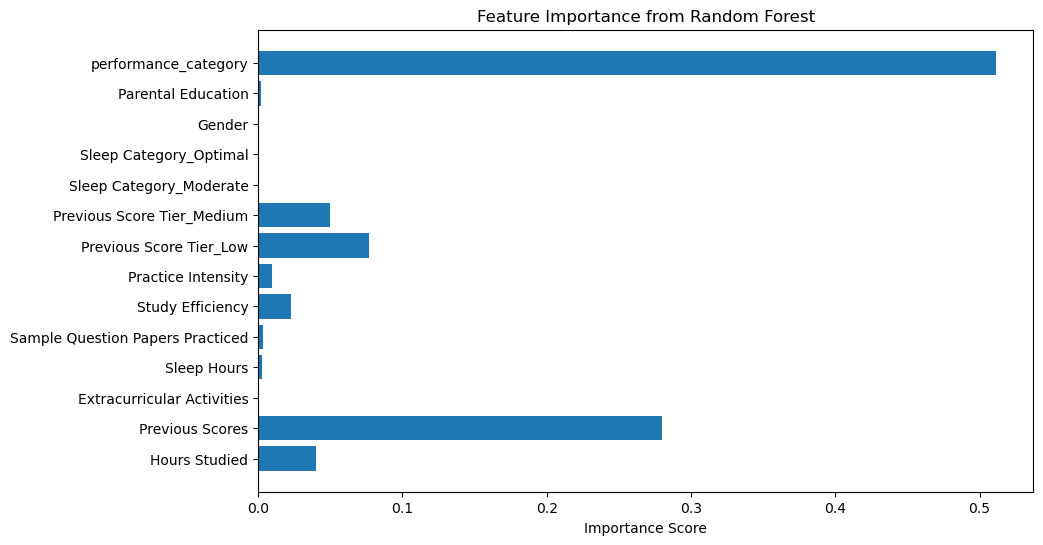

In [68]:
# Contribution of each features for prediction
importances = rfc.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.show()

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       245
         Low       1.00      1.00      1.00       771
      Medium       1.00      1.00      1.00       959

    accuracy                           1.00      1975
   macro avg       1.00      1.00      1.00      1975
weighted avg       1.00      1.00      1.00      1975



In [70]:
from sklearn.metrics import accuracy_score

train_pred = rfc.predict(X_train)
test_pred = rfc.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, train_pred))
print("Test Accuracy :", accuracy_score(y_test, test_pred))

Train Accuracy: 1.0
Test Accuracy : 1.0


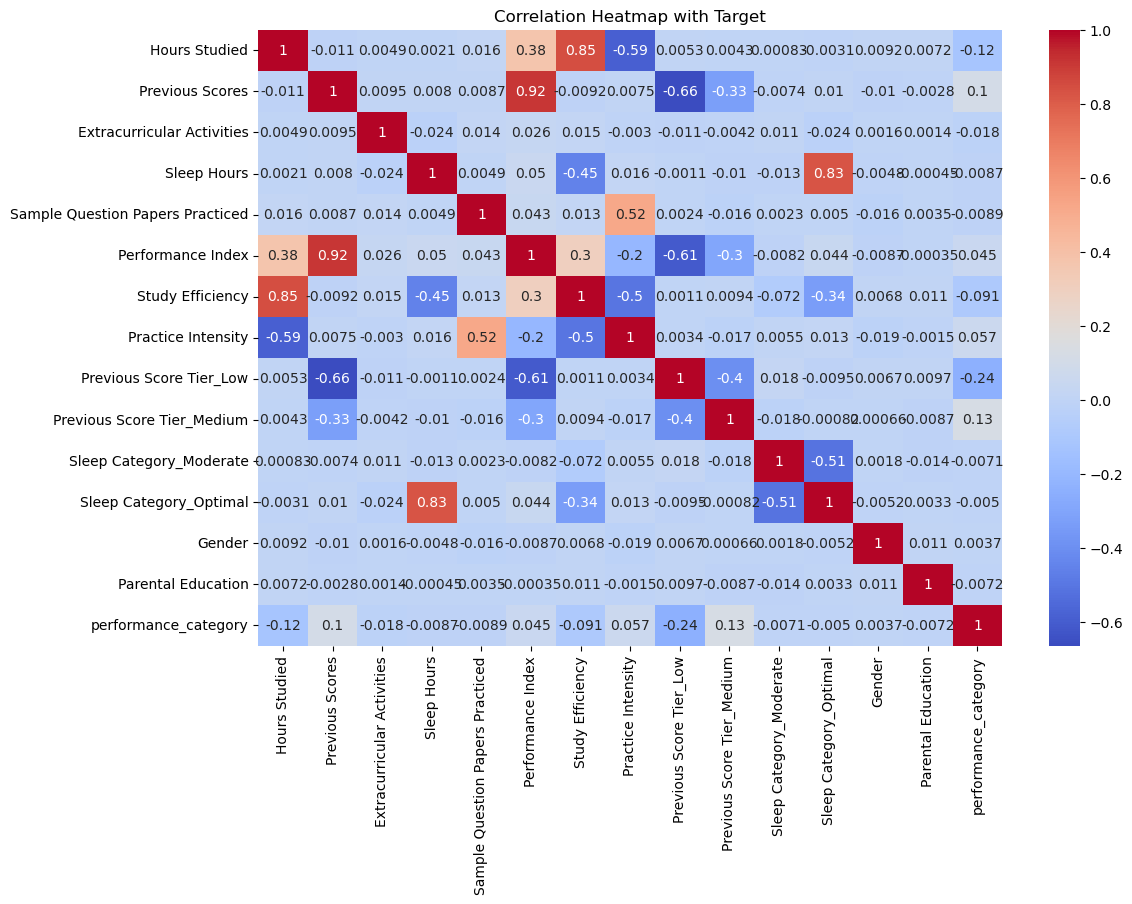

In [71]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap with Target")
plt.show()

In [72]:
log_model.fit(X_train, y_train)
print("LogReg Train Acc:", accuracy_score(y_train, log_model.predict(X_train)))
print("LogReg Test Acc :", accuracy_score(y_test, log_model.predict(X_test)))

LogReg Train Acc: 1.0
LogReg Test Acc : 1.0


# Deep Learning

In [73]:
from sklearn.preprocessing import LabelEncoder , StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam

In [74]:
 pd.DataFrame(X).isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Study Efficiency                    0
Practice Intensity                  0
Previous Score Tier_Low             0
Previous Score Tier_Medium          0
Sleep Category_Moderate             0
Sleep Category_Optimal              0
Gender                              0
Parental Education                  0
performance_category                0
dtype: int64

In [75]:
# categorical columns into numerical columns
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender']) 
df['Parental Education'] = le.fit_transform(df['Parental Education'])
y = le.fit_transform(df['Performance Category']) 

In [76]:
X = df.drop(['Performance Category', 'Performance Index'], axis=1)


In [77]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
#convert target labels into encoded format
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

In [80]:
X_train.shape
y_train.shape

(7898, 3)

In [81]:
# Converts the  training datatype into float
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

In [82]:
#Build the neural network
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [83]:
#complie
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [84]:
#train
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16,verbose=1)

Epoch 1/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9120 - loss: 0.2813 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 2/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 4.3795e-04
Epoch 3/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 3.8510e-04 - val_accuracy: 1.0000 - val_loss: 1.6789e-04
Epoch 4/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 1.0000 - loss: 1.7142e-04 - val_accuracy: 1.0000 - val_loss: 1.0465e-04
Epoch 5/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 1.0000 - loss: 1.0767e-04 - val_accuracy: 1.0000 - val_loss: 5.7750e-05
Epoch 6/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 1.0000 - loss: 7.4259e-05 - val_accuracy: 1.0000 - val_loss: 3.7155e-05
Epoch 7/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 4.0323e-05 - val_accuracy: 1.0000 - val_loss: 2.7821e-05
Epoch 8/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accura

In [85]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [86]:
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       245
           1       1.00      1.00      1.00       771
           2       1.00      1.00      1.00       959

    accuracy                           1.00      1975
   macro avg       1.00      1.00      1.00      1975
weighted avg       1.00      1.00      1.00      1975



# HyperParameter Tuning

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from scikeras.wrappers import KerasClassifier

In [92]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.utils import to_categorical

In [94]:
from sklearn.preprocessing import LabelEncoder

In [95]:
# Encode performance_category properly
le = LabelEncoder()
df['Performance Category'] = le.fit_transform(df['Performance Category'])

# Now safely extract y
y = df['Performance Category']

In [96]:
from sklearn.model_selection import train_test_split
X = df.drop(['Performance Category', 'Performance Index'], axis=1)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
def build_model(optimizer='adam', dropout_rate=0.2, neurons=32):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation='softmax'))  # 3 classes
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(model=build_model, verbose=0)

In [98]:
param_grid = {'batch_size': [32],'epochs': [30],'model__optimizer': ['adam'],'model__dropout_rate': [0.3],'model__neurons': [64]}

In [99]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

In [100]:
print("Best Accuracy: {:.2f}%".format(grid_result.best_score_ * 100))
print("Best Hyperparameters: ", grid_result.best_params_)

Best Accuracy: 100.00%
Best Hyperparameters:  {'batch_size': 32, 'epochs': 30, 'model__dropout_rate': 0.3, 'model__neurons': 64, 'model__optimizer': 'adam'}


In [101]:
# Use the best estimator to predict
y_pred = grid_result.best_estimator_.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       245
           1       1.00      1.00      1.00       771
           2       1.00      1.00      1.00       959

    accuracy                           1.00      1975
   macro avg       1.00      1.00      1.00      1975
weighted avg       1.00      1.00      1.00      1975

Confusion Matrix:
 [[245   0   0]
 [  0 771   0]
 [  0   0 959]]


In [102]:
df.to_excel('Studentprediction.xlsx')

In [103]:
import pickle
from sklearn.preprocessing import StandardScaler

# Example: Assuming `model` is trained and `scaler` is used
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [105]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


# Feature Engineering
df['Study Efficiency'] = df['Hours Studied'] / (df['Sleep Hours'] + 1e-5)
df['Practice Intensity'] = df['Sample Question Papers Practiced'] / (df['Hours Studied'] + 1e-5)

# Define features and target
X = df[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 
        'Study Efficiency', 'Practice Intensity']]
y = df['Performance Index']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Save model and scaler
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ Model and Scaler saved successfully!")


✅ Model and Scaler saved successfully!
